<a href="https://colab.research.google.com/github/Ananya22-ux/OASIS-INFOBYTE/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1]:
# Load the dataset
# Replace 'customer_data.csv' with your actual dataset file
df = pd.read_csv('customer_data.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

In [4]:
import pandas as pd

# Define your DataFrame 'df' here, or load it from a file
# For example:
# df = pd.read_csv('your_dataset.csv')

# Define your clean_and_preprocess_data function
def clean_and_preprocess_data(df):
    # Display initial info
    print("Initial dataframe info:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())

    # Handle missing values
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if df[column].dtype in ['int64', 'float64']:
                # For numeric columns, fill with median
                df[column].fillna(df[column].median(), inplace=True)
            else:
                # For non-numeric columns, fill with mode
                df[column].fillna(df[column].mode()[0], inplace=True)

    print("\nAfter handling missing values:")
    print(df.isnull().sum())

    # Convert date column to datetime
    date_column = 'purchase_date'  # Change this to your actual date column name
    if date_column in df.columns:
        try:
            df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
            print(f"\nConverted '{date_column}' to datetime.")
        except Exception as e:
            print(f"Error converting '{date_column}' to datetime: {e}")
            print("Please check the format of your date column.")
    else:
        print(f"\nWarning: '{date_column}' not found in the dataframe.")
        print("Available columns:", df.columns.tolist())

    # Remove rows with invalid dates (if any)
    if date_column in df.columns:
        invalid_dates = df[df[date_column].isnull()].index
        if len(invalid_dates) > 0:
            df = df.drop(invalid_dates)
            print(f"\nRemoved {len(invalid_dates)} rows with invalid dates.")

    print("\nFinal dataframe info:")
    print(df.info())

    return df

# Use the function
# Assuming 'df' is your DataFrame, you can call the function like this:
# df = clean_and_preprocess_data(df)
# Example usage:
# df_cleaned = clean_and_preprocess_data(df)


In [7]:
import pandas as pd

# Example DataFrame 'df' with relevant columns 'customer_id', 'purchase_date', 'order_id', 'total_amount'
data = {
    'customer_id': [1, 2, 3, 1, 2],
    'purchase_date': ['2023-01-01', '2023-01-15', '2023-02-01', '2023-01-20', '2023-02-05'],
    'order_id': [101, 102, 103, 104, 105],
    'total_amount': [100, 150, 200, 120, 180]
}
df = pd.DataFrame(data)
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Calculate current date for recency calculation
current_date = df['purchase_date'].max()

# Calculate RFM metrics
df_rfm = df.groupby('customer_id').agg({
    'purchase_date': lambda x: (current_date - x.max()).days,  # Recency calculation
    'order_id': 'count',  # Frequency calculation
    'total_amount': 'sum'  # Monetary value calculation
})

# Rename columns for clarity
df_rfm.columns = ['recency', 'frequency', 'monetary']

# Display the resulting RFM DataFrame
print("RFM DataFrame:")
print(df_rfm)


RFM DataFrame:
             recency  frequency  monetary
customer_id                              
1                 16          2       220
2                  0          2       330
3                  4          1       200


Descriptive Statistics of RFM:
         recency  frequency  monetary
count   3.000000   3.000000       3.0
mean    6.666667   1.666667     250.0
std     8.326664   0.577350      70.0
min     0.000000   1.000000     200.0
25%     2.000000   1.500000     210.0
50%     4.000000   2.000000     220.0
75%    10.000000   2.000000     275.0
max    16.000000   2.000000     330.0


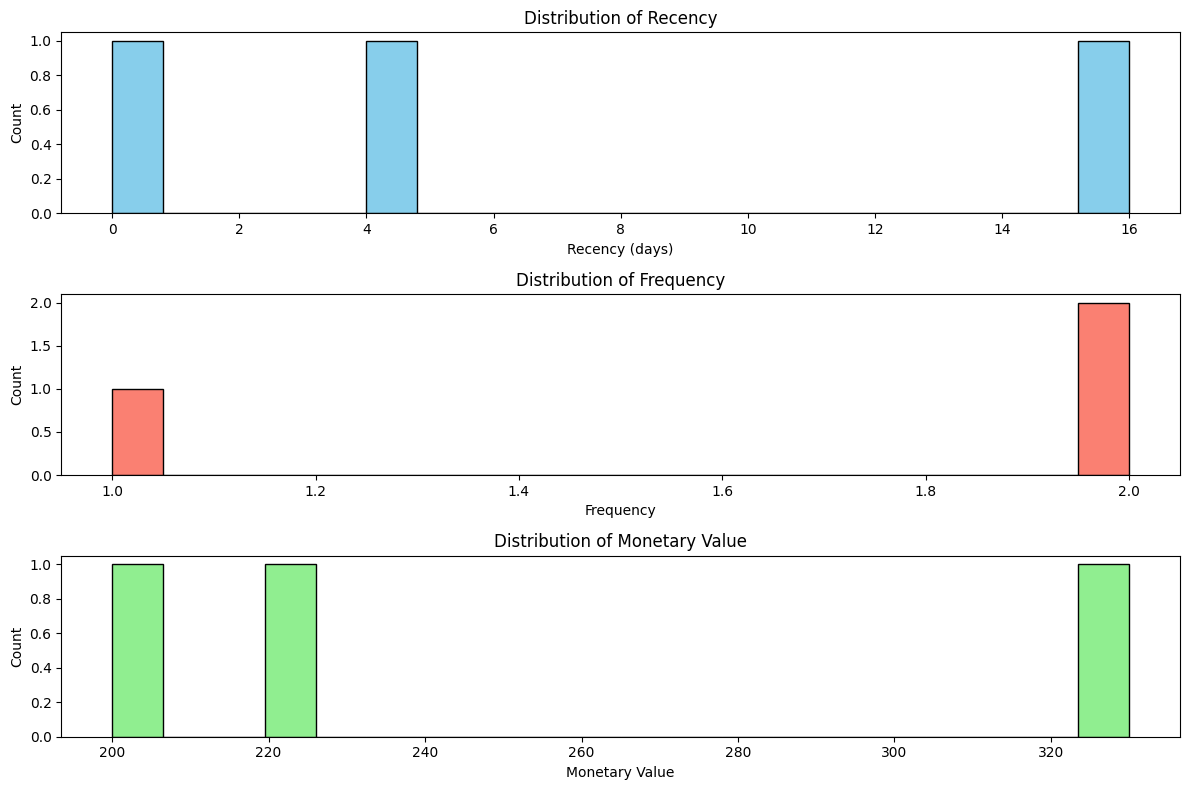

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_rfm is already calculated from the previous steps

# Display descriptive statistics
print("Descriptive Statistics of RFM:")
print(df_rfm.describe())

# Visualize distribution of RFM features
plt.figure(figsize=(12, 8))

# Plot histograms for each RFM feature
plt.subplot(3, 1, 1)
plt.hist(df_rfm['recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Count')

plt.subplot(3, 1, 2)
plt.hist(df_rfm['frequency'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(3, 1, 3)
plt.hist(df_rfm['monetary'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


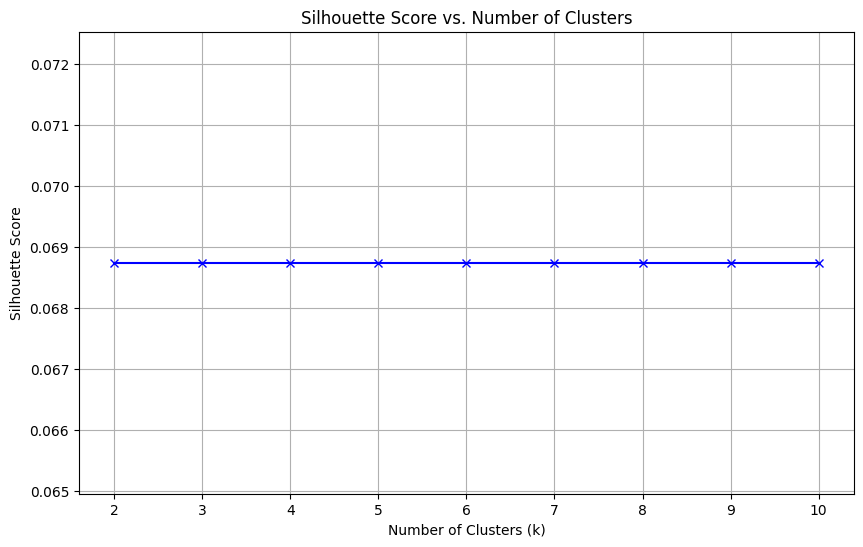

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_rfm is already calculated from the previous steps

# Standardize the features
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)  # Testing for clusters from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)


    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(K)
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


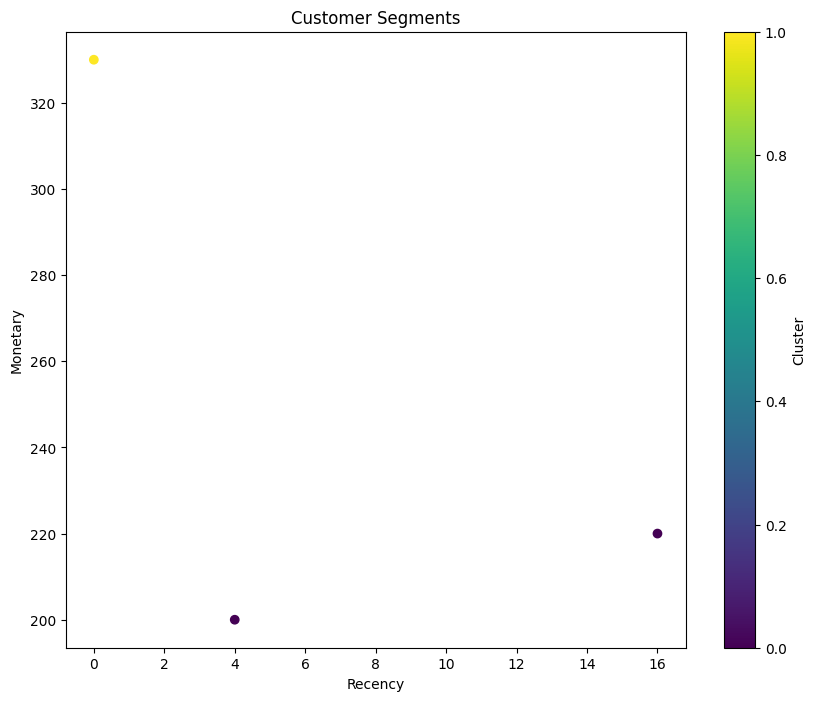

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_rfm is already calculated from the previous steps

# Standardize the features
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)  # Testing for clusters from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)


    silhouette_scores.append(silhouette_avg)

# Determine optimal K based on highest silhouette score
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]

# Perform K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_rfm['recency'], df_rfm['monetary'], c=df_rfm['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segments')
plt.colorbar(scatter, label='Cluster')
plt.show()



In [25]:
# Analyze characteristics of each segment
segment_analysis = df_rfm.groupby('Cluster').mean()
print(segment_analysis)

# Provide insights and recommendations
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    print(segment_analysis.loc[cluster])
    print("Recommendations:")
    if segment_analysis.loc[cluster, 'recency'] < segment_analysis['recency'].mean():
        print("- Recent customers: Focus on retention and upselling.")
    else:
        print("- Less recent customers: Re-engagement campaign needed.")
    if segment_analysis.loc[cluster, 'frequency'] > segment_analysis['frequency'].mean():
        print("- Frequent buyers: Implement loyalty program.")
    else:
        print("- Infrequent buyers: Encourage more regular purchases.")
    if segment_analysis.loc[cluster, 'monetary'] > segment_analysis['monetary'].mean():
        print("- High-value customers: Provide premium services/products.")
    else:
        print("- Lower-value customers: Offer promotions to increase spend.")

         recency  frequency  monetary
Cluster                              
0           10.0        1.5     210.0
1            0.0        2.0     330.0

Cluster 0:
recency       10.0
frequency      1.5
monetary     210.0
Name: 0, dtype: float64
Recommendations:
- Less recent customers: Re-engagement campaign needed.
- Infrequent buyers: Encourage more regular purchases.
- Lower-value customers: Offer promotions to increase spend.

Cluster 1:
recency        0.0
frequency      2.0
monetary     330.0
Name: 1, dtype: float64
Recommendations:
- Recent customers: Focus on retention and upselling.
- Frequent buyers: Implement loyalty program.
- High-value customers: Provide premium services/products.
